In [1]:
!pip install --upgrade jupyterlab jupyterlab-git
git remote add origin https://github.com/Sandy1928/DS_Portfolio_1.git
git add Uber_usage_workbook.ipynb  # Add specific files
git add .

SyntaxError: invalid syntax (2208875032.py, line 2)

In [22]:
#Main queries

!pip install openpyxl
import pandas as pd

df = pd.read_excel('C:/Users/074007781/Desktop/ubers DA/Ubers may-july 24.xlsx')

monthOrder = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_category = pd.CategoricalDtype(categories=monthOrder, ordered=True)

year_2024_data = df[df['Request Date (Local)'].dt.year == 2024]
monthly_trips_2024 = df.groupby([df['Request Date (Local)'].dt.strftime('%B').astype(month_category), year_2024_data['Request Date (Local)'].dt.year],observed=False)['Trip/Eats ID'].count()
print("Trips by month on 2024 \n", + monthly_trips_2024)

expenses_by_month_2024 = df.groupby([df['Request Date (Local)'].dt.strftime('%B').astype(month_category), year_2024_data['Request Date (Local)'].dt.year],observed=False)['Transaction Amount in Local Currency (incl. Taxes)'].sum()
print("Total expenses by month in 2024 \n", + expenses_by_month_2024)

expenses_by_year = df.groupby(df['Request Date (Local)'].dt.year)['Transaction Amount in Local Currency (incl. Taxes)'].sum()
print("Total expenses by year \n", + expenses_by_year)

year_2024_data = df[df['Request Date (Local)'].dt.year == 2024]
trip_counts_2024 = year_2024_data.groupby(['First Name', year_2024_data['Request Date (Local)'].dt.year,
                                      year_2024_data['Request Date (Local)'].dt.strftime('%B').astype(month_category)],observed=False)['Trip/Eats ID'].count()

trip_counts_2024.columns = {'First Name', 'Year', 'Month', 'Trip Count', 'Total amount'}

print(trip_counts_2024)

program_mor = df[df['Program'] == 'MORNING']
program_aft = df[df['Program'] == 'AFTERNOON']

monthly_trips_2024_mor = year_2024_data.groupby([df['Request Date (Local)'].dt.strftime('%B').astype(month_category),
                                             year_2024_data['Request Date (Local)'].dt.year,
                                             program_mor['Program']],observed=False)['Trip/Eats ID'].count()
monthly_trips_2024_aft = year_2024_data.groupby([df['Request Date (Local)'].dt.strftime('%B').astype(month_category),
                                             year_2024_data['Request Date (Local)'].dt.year,
                                             program_aft['Program']],observed=False)['Trip/Eats ID'].count()

print("Trips by program on 2023 \n", + monthly_trips_2024_mor)
print("Trips by program on 2023 \n", + monthly_trips_2024_aft)

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------------------------- ------------ 0.8/1.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
   --------------------- ------------------ 3.1/5.9 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 5.9/5.9 MB 15.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ------------- -------------------------- 1.0/3.1 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 14.1 MB/s eta 0:00:00
Trips by month on 2024 
 Request Date (Local)  Request Date (Local)
January               2024                      0
February              2024                      0
March                 2024                      0
April                 2024                      0
May                   2024                    203
June           

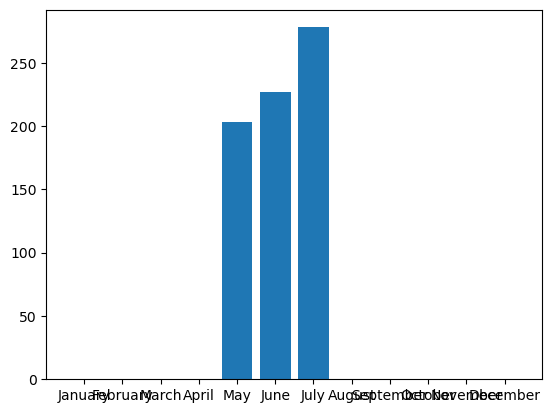

In [4]:
#bar graph of trips taken by month
import matplotlib.pyplot as plt

x = monthOrder
y = monthly_trips_2024

plt.bar(x,y)
plt.show()

In [5]:
#data frame of trips taken by person by month
year_2024_data = df[df['Request Date (Local)'].dt.year == 2024]
trip_counts_2024 = year_2024_data.groupby(['First Name', year_2024_data['Request Date (Local)'].dt.year,
                                      year_2024_data['Request Date (Local)'].dt.month])['Trip/Eats ID'].count()


trip_counts_2024.columns = ['First Name', 'Year', 'Month', 'Trip Count']
print(trip_counts_2024)

First Name  Request Date (Local)  Request Date (Local)
Angélica    2024                  5                        8
                                  6                       18
                                  7                       20
Arlette     2024                  7                        1
Asdrubal    2024                  5                       20
                                  6                       22
                                  7                       21
Betsy       2024                  6                        3
Brenda      2024                  5                       10
                                  6                       10
                                  7                       26
Cesar       2024                  5                       15
                                  6                       24
                                  7                       27
Daniel      2024                  5                        7
                              

In [6]:
#trips taken by person and their total expense
trip_counts_and_expenses = year_2024_data.groupby('First Name').agg({'Trip/Eats ID': 'count', 'Transaction Amount in Local Currency (incl. Taxes)': 'sum'})
print(trip_counts_and_expenses)

            Trip/Eats ID  Transaction Amount in Local Currency (incl. Taxes)
First Name                                                                  
Angélica              46                                            2068.80 
Arlette                1                                             269.94 
Asdrubal              63                                            9420.11 
Betsy                  3                                             605.99 
Brenda                46                                           14709.17 
Cesar                 66                                           16723.36 
Daniel                25                                            6257.45 
Elizabeth             65                                           18294.61 
Jose Luis             59                                           14542.58 
Karell                65                                           15484.70 
Magdiel               32                                            5946.01 

In [7]:
#pivot table of ripda taken by month, by person and their expense by month
pivot_table = year_2024_data.pivot_table(index='First Name', columns=year_2024_data['Request Date (Local)'].dt.strftime('%B').astype(month_category),
                                     values=['Trip/Eats ID', 'Transaction Amount in Local Currency (incl. Taxes)'],
                                     aggfunc={'Trip/Eats ID': 'count', 'Transaction Amount in Local Currency (incl. Taxes)': 'sum'}, fill_value=0)
print(pivot_table)

                     Transaction Amount in Local Currency (incl. Taxes)  \
Request Date (Local)                                            January   
First Name                                                                
Angélica                                                            0.0   
Arlette                                                             0.0   
Asdrubal                                                            0.0   
Betsy                                                               0.0   
Brenda                                                              0.0   
Cesar                                                               0.0   
Daniel                                                              0.0   
Elizabeth                                                           0.0   
Jose Luis                                                           0.0   
Karell                                                              0.0   
Magdiel                  

C:\Users\074007781\AppData\Local\Temp\ipykernel_24500\849320167.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = year_2024_data.pivot_table(index='First Name', columns=year_2024_data['Request Date (Local)'].dt.strftime('%B').astype(month_category),


In [8]:
#pivot table of count of trips taken by person and by program
pivot_table_program = year_2024_data.pivot_table(index='First Name', columns=['Program', year_2024_data['Request Date (Local)'].dt.strftime('%B').astype(month_category)],
                                     values='Trip/Eats ID',
                                     aggfunc='count', fill_value=0)
print(pivot_table_program)

Program              AFTERNOON                                            \
Request Date (Local)   January February March April May June July August   
First Name                                                                 
Angélica                     0        0     0     0   0    6    7      0   
Arlette                      0        0     0     0   0    0    0      0   
Asdrubal                     0        0     0     0   9   11    9      0   
Betsy                        0        0     0     0   0    2    0      0   
Brenda                       0        0     0     0   5    5   13      0   
Cesar                        0        0     0     0   8   12   13      0   
Daniel                       0        0     0     0   3    7    2      0   
Elizabeth                    0        0     0     0   8   11   12      0   
Jose Luis                    0        0     0     0   6   10   11      0   
Karell                       0        0     0     0  10   11   10      0   
Magdiel     

C:\Users\074007781\AppData\Local\Temp\ipykernel_24500\935365887.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_program = year_2024_data.pivot_table(index='First Name', columns=['Program', year_2024_data['Request Date (Local)'].dt.strftime('%B').astype(month_category)],


In [9]:
#data frame of trips taken by program by month
trip_counts_program_2024 = year_2024_data.groupby(['Program',year_2024_data['Request Date (Local)'].dt.month])['Trip/Eats ID'].count()
print(trip_counts_program_2024)

Program    Request Date (Local)
AFTERNOON  5                        83
           6                       102
           7                       128
MORNING    5                       120
           6                       125
           7                       150
Name: Trip/Eats ID, dtype: int64


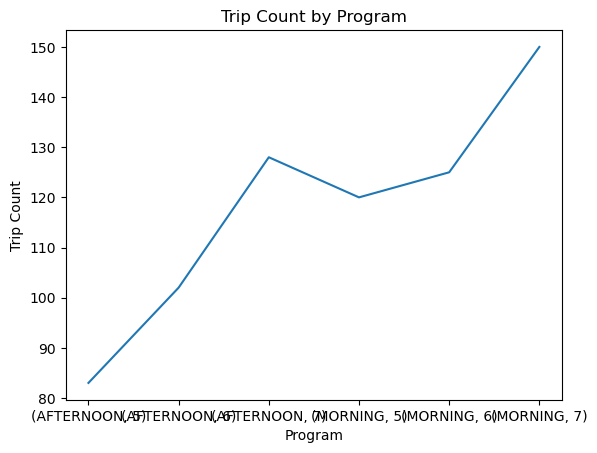

In [10]:
#graph of the trips taken by program by month
import matplotlib.pyplot as plt

trip_counts_program_2024.plot(x='Program', y='Trip/Eats ID')

plt.xlabel('Program')
plt.ylabel('Trip Count')
plt.title('Trip Count by Program')

plt.show()

In [11]:
#data frame of the count of trips taken by
trip_counts_by_name_2024 = year_2024_data.groupby('First Name',observed=False)['Trip/Eats ID'].count()

trip_counts_by_name_2024.columns = {'First Name','Trip Count'}

print(trip_counts_by_name_2024)

First Name
Angélica     46
Arlette       1
Asdrubal     63
Betsy         3
Brenda       46
Cesar        66
Daniel       25
Elizabeth    65
Jose Luis    59
Karell       65
Magdiel      32
Mariana      32
Melanie      67
Oscar        21
Rogelio      54
Roman        27
Ruben        20
Susana       16
Name: Trip/Eats ID, dtype: int64


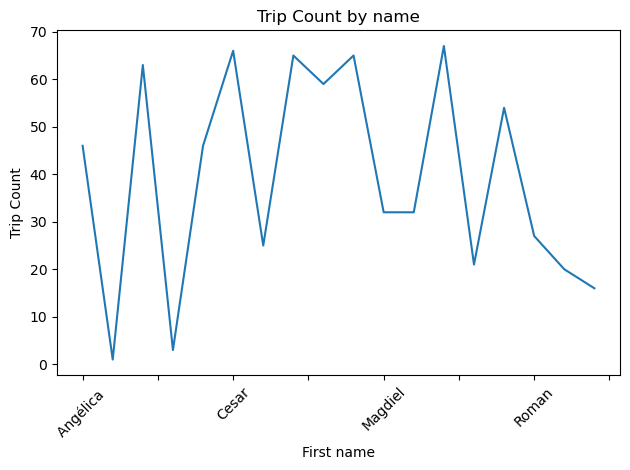

In [12]:
#graph of trips taken by month
import matplotlib.pyplot as plt

trip_counts_by_name_2024.plot(x='First name', y='Trip Count')

plt.xlabel('First name')
plt.ylabel('Trip Count')
plt.title('Trip Count by name')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
import pandas as pd
!pip install geopy
from geopy.geocoders import Nominatim

unique_pickup_addresses = df['Pickup Address'].unique()
pickup_address_df = pd.DataFrame(unique_pickup_addresses, columns=['Unique Pickup Addresses'])
print(pickup_address_df)


                              Unique Pickup Addresses
0            Carretera a El Castillo, 45693, El Salto
1   Camino al Castillo 2200, El Salto, 45694 El Sa...
2   Av Revolucion 3789, 45540 San Pedro Tlaquepaqu...
3   C. Moctezuma 70, Lomas del Batán, 45190 Zapopa...
4      Calle Ingenieros 2431B, 45030 Zapopan, Jalisco
5                 La Gloria Del Colli, 45010, Zapopan
6         Valle de Juárez 169, 45643 Palomar, Jalisco
7                              45239 Zapopan, Jalisco
8                     Privada Rocio, Zapopan, Jalisco
9                   Calle Morelos, 44600, Guadalajara
10                   Av B 623, 45150 Zapopan, Jalisco
11  Calle Ramón López Velarde 932, 44840 Guadalaja...
12  Calzada Córdoba 959, 45560 San Pedro Tlaquepaq...
13                          45429 Paseo de la Cazcana
14  Camino a Las Granjas 382, 45645 San Agustín, J...
15               45559 San Pedro Tlaquepaque, Jalisco
16                Calzada Independencia Norte, 44290 
17                          

In [17]:
# Initialize geolocator
geolocator = Nominatim(user_agent="Uber_usage_workbook", timeout=40)

# Create empty columns for latitude and longitude
pickup_address_df['latitude'] = ""
pickup_address_df['longitude'] = ""

# Iterate over the addresses and get their coordinates
for index, row in pickup_address_df.iterrows():
  try:
    location = geolocator.geocode(row['Unique Pickup Addresses'])
    if location:
      pickup_address_df.loc[index, 'latitude'] = location.latitude
      pickup_address_df.loc[index, 'longitude'] = location.longitude
      #time.sleep(30)
    else:
      print(f"Could not find coordinates for address: {row['Unique Pickup Addresses']}")
  except Exception as e:
    print(f"Error geocoding address: {row['Unique Pickup Addresses']}. Error: {e}")

print(pickup_address_df)

                              Unique Pickup Addresses   latitude   longitude
0            Carretera a El Castillo, 45693, El Salto  20.546833 -103.265555
1   Camino al Castillo 2200, El Salto, 45694 El Sa...  20.504578 -103.248048
2   Av Revolucion 3789, 45540 San Pedro Tlaquepaqu...  20.617501 -103.286122
3   C. Moctezuma 70, Lomas del Batán, 45190 Zapopa...  20.719983 -103.351805
4      Calle Ingenieros 2431B, 45030 Zapopan, Jalisco  20.665593 -103.427051
5                 La Gloria Del Colli, 45010, Zapopan  20.656913 -103.450228
6         Valle de Juárez 169, 45643 Palomar, Jalisco  20.592409 -103.450368
7                              45239 Zapopan, Jalisco  20.609872 -103.428652
8                     Privada Rocio, Zapopan, Jalisco  20.754262 -103.438417
9                   Calle Morelos, 44600, Guadalajara  20.675865  -103.37263
10                   Av B 623, 45150 Zapopan, Jalisco  20.721232 -103.378908
11  Calle Ramón López Velarde 932, 44840 Guadalaja...  20.645775 -103.311297

In [21]:
!pip install folium
import folium

# Create a map centered on the mean latitude and longitude
map_center = [pickup_address_df['latitude'].mean(), pickup_address_df['longitude'].mean()]
map_obj = folium.Map(location=map_center, zoom_start=12)

# Add markers for each address
for index, row in pickup_address_df.iterrows():
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=row['Unique Pickup Addresses']
  ).add_to(map_obj)

# Display the map
display(map_obj)